# Assignment 2: RNN Networks and Timeseries Data
This assignment will use several different RNN network architectures to predict the production
amount of a single type of electricity product, based on it's production and the production of
at least 3 other electricity products over a chosen time period. 
The example provided in the assignment task *"Can we predict the GWh of wind energy produced by Australia in 2020 based on the production of wind, natural gas, solar and hydro over the previous 5 years?"*

We will use the Electricity Procution Dataset from Kaggle
The RNN(s) will be trained on data from 10 different countries.
    - Austra, Brazil, Canada, Chile, India, Ireland, New Zealand, Peru, Sweden, Turkey
Selected countries will have differences: location, population, environment, economic status.
We will then make inferences from 5 different countries to evaluate the effectiveness of the models


"Are RNNs useful in predicting the amount of electricity (in GWh) of a specific type (e.g., Wind, Solar, Natural Gas, etc.) produced by a country?"

## My target
- I'll look at using these RNN architecture to make predictions about solar energy
- I'll try a few different sequence lengths and prediction windows for this, the selected choice will be italicised
  - 6 months -> predict next 3
  - 12 months -> predict next 6 or 12
  - 3 months -> predict next month *chosen* 

## Obtaining Data
- Download the dataset from kaggle
- Load it into a pandas dataframe
- Plot some of the data to have a look at it

In [1]:
import opendatasets as od
#Download the data from kaggle
od.download("https://www.kaggle.com/datasets/sazidthe1/global-electricity-production")

Skipping, found downloaded files in "./global-electricity-production" (use force=True to force download)


## Pandas and Data Manipulation
- I'll create a pandas dataframe from this dataset
- Then we can visualise the data using matplotlib.

In [1]:
import pandas as pd
csv_file = "global-electricity-production/global_electricity_production_data.csv"

electricity_data = pd.read_csv(csv_file)
# electricity_data['date'] = pd.to_datetime(electricity_data['date'])
electricity_data.head()

,country_name,date,parameter,product,value,unit
0,Australia,12/1/2023,Net Electricity Production,Electricity,22646.1901,GWh
1,Australia,12/1/2023,Net Electricity Production,Total Combustible Fuels,13397.9356,GWh
2,Australia,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,GWh
3,Australia,12/1/2023,Net Electricity Production,Oil and Petroleum Products,289.5415,GWh
4,Australia,12/1/2023,Net Electricity Production,Natural Gas,3091.9272,GWh


## Visualisation
- Why don't we take a little look at the data. 
- We can grab all the data belonging to Belgium and take a look at it. 
- The dataset has multiple rows for each month.
  - Each month is labelled with a country and corresponds to a different product and volume produced. 
  - We're not interested in all of it so I'll filter the values down to just Hydro, Solar, Natural Gas and Wind
  - I'll then pull only Belgium from this filtered set so we can see only Belgium's production of these things over this 13 year span
  

In [ ]:
hydro_gas_solar_wind = electricity_data[electricity_data["product"].isin(["Hydro", "Solar", "Natural Gas", "Wind", "Total Exports"])]
belgium = hydro_gas_solar_wind[hydro_gas_solar_wind["country_name"] == "Belgium"]
belgium = belgium.iloc[0:240]
belgium = belgium.sort_index(ascending=False)
#I'll print a random sample of it.
# belgium.drop(['country_name','parameter','unit','date'], axis=1, inplace=True)

belgium_solar = belgium[belgium['product'] == 'Solar']
belgium_wind = belgium[belgium['product'] == 'Wind']
belgium_gas = belgium[belgium['product'] == 'Natural Gas']
belgium_hydro = belgium[belgium['product'] == 'Hydro']

electricity_data.sample(30)
belgium.head(30)


,country_name,date,parameter,product,value,unit
48221,Canada,1/1/2019,Net Electricity Production,Solar,141.4522,GWh
48220,Canada,1/1/2019,Net Electricity Production,Wind,3681.5025,GWh
48219,Canada,1/1/2019,Net Electricity Production,Hydro,39854.0000,GWh
48216,Canada,1/1/2019,Net Electricity Production,Natural Gas,6063.0757,GWh
47341,Canada,2/1/2019,Net Electricity Production,Solar,167.4302,GWh
47340,Canada,2/1/2019,Net Electricity Production,Wind,3096.8480,GWh
47339,Canada,2/1/2019,Net Electricity Production,Hydro,36316.6541,GWh
47336,Canada,2/1/2019,Net Electricity Production,Natural Gas,6000.4713,GWh
46461,Canada,3/1/2019,Net Electricity Production,Solar,352.7881,GWh
46460,Canada,3/1/2019,Net Electricity Production,Wind,3452.4306,GWh


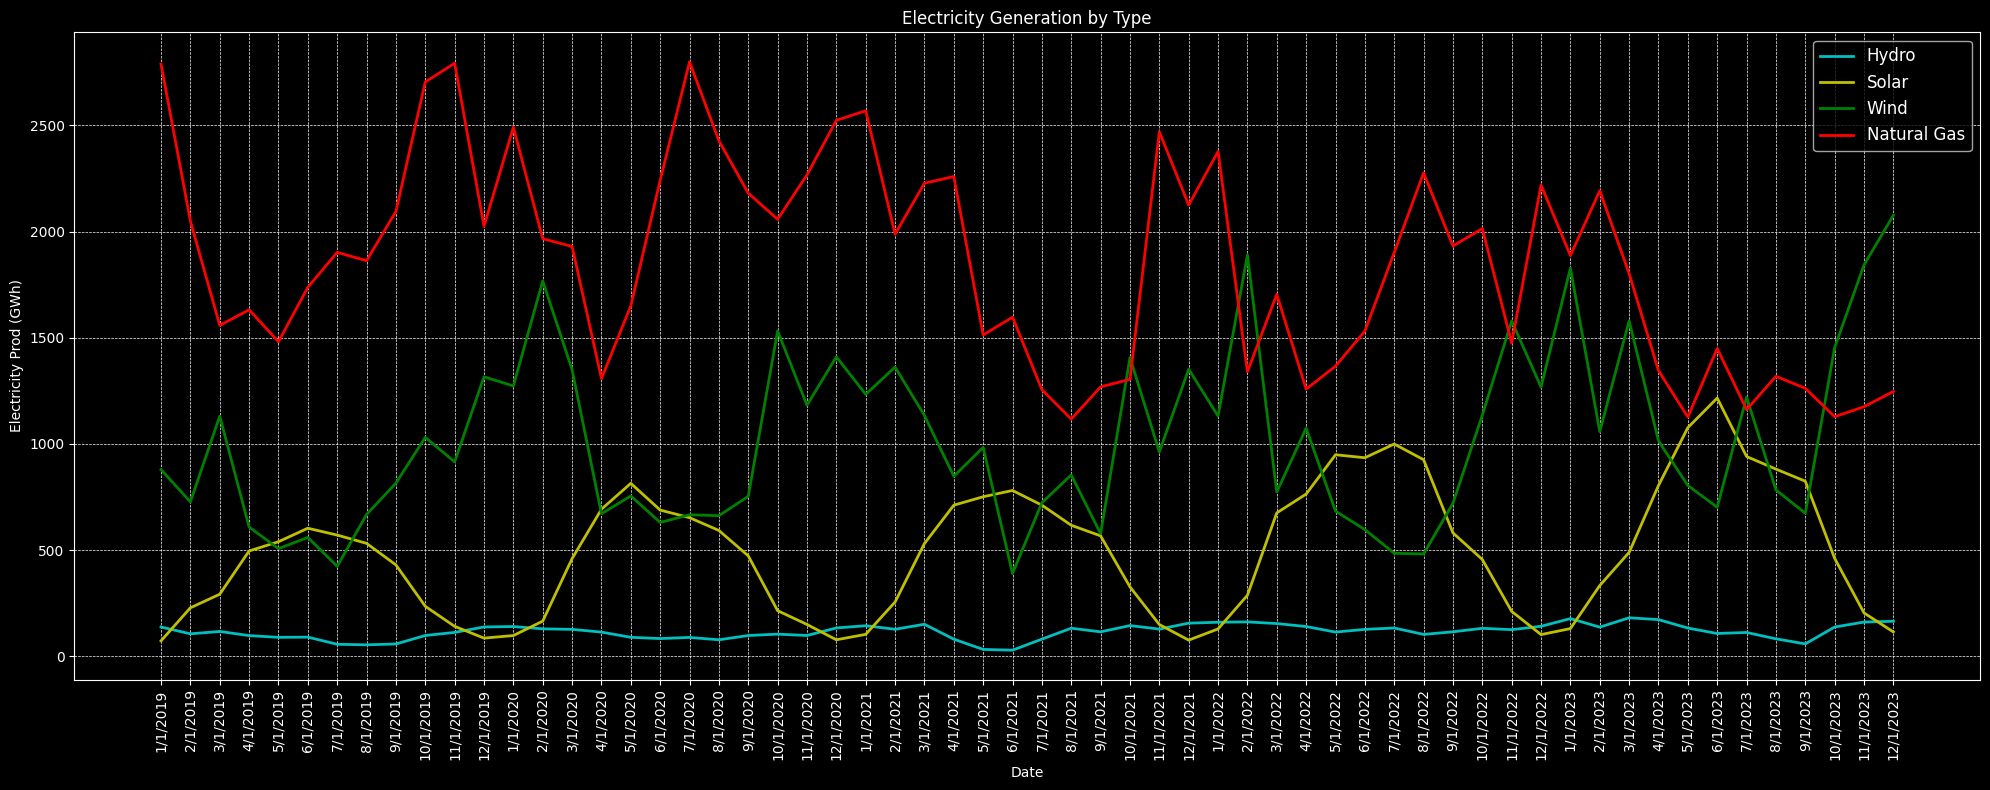

In [4]:
import matplotlib.pyplot as plt




plt.style.use('dark_background')
plt.figure(figsize=(20,8))
plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.ylabel('Electricity Prod (GWh)')
plt.title("Electricity Generation by Type")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.plot(belgium_hydro['date'],belgium_hydro['value'], linewidth=2, c='c', label="Hydro")
plt.plot(belgium_solar['date'],belgium_solar['value'], linewidth=2, c='y', label='Solar')
plt.plot(belgium_wind['date'],belgium_wind['value'], linewidth=2, c='g', label='Wind')
plt.plot(belgium_gas['date'],belgium_gas['value'], linewidth=2, c='r', label='Natural Gas')
plt.tight_layout()
plt.legend(loc='upper right', fontsize='large')
plt.show()

## Neat!
- How cool is that?!
- The above plot is 5 years worth of electricity generation for Belgium. Yellow is solar (note the periodcity with the seasons, very neat). Blue is hydro, green is wind and red is a nasty fossil fuel (natural gas). 
- We can see as solar and wind production trend upwards natural gas production declines, also very cool.
- Over this 5 year span Hydro output has remained relatively consistent. Perhaps Belgium doesn't consider the expense or environmental destruction caused by dams to be worth it when wind and solar are coming down in price and are cheaper to produce?
- Who knows! 
- But even we can see that there are trends here, if we can do it a model can do it too. 

## Preprocessing
- Okay we've had a look at the data and we roughly know what it looks like so now we need to create a dataframe with the data we want to consider
- The way the data is structure now isn't super friendly to what our task is
- I want each record to correspond to 1 month of data and have each countries electricity generation as a different feature
- That way each record the RNN looks at contains all the information
- If we were to load them in as is it would see the different rows as different timesteps when really they're different records.
- I wasn't sure how to do this because I'm not super familiar with Pandas so I did ask GPT, I'll paste it's output here. Basically it recommended filtering and then using the pivot_table function, which honestly I probably could have found on my own but I asked GPT so I'll be honest about that. I thought it would be more involved than this. I should have assumed Pandas would have a method for this. 

- Note I only gave it a sample of the CSV not the whole thing, and not the column names. 
- We can probably infer that this kaggle set is in it's own training dataset.
- I'd already figured out how to use .isin() by reading pandas documentation. I should have just read the documentation more. 

# 1. Filter only 'Net Electricity Production' entries
filtered = df[df['category'] == 'Net Electricity Production']

# 2. Focus on energy types of interest
technologies = ['Solar', 'Wind', 'Natural Gas', 'Hydro']
filtered = filtered[filtered['subcategory'].isin(technologies)]

# 3. Pivot the table
pivoted = filtered.pivot_table(
    index=['country', 'date'],
    columns='subcategory',
    values='value'
).reset_index()

# 4. Rename columns to lowercase
pivoted.columns.name = None  # remove index name from pivot
pivoted.columns = [col.lower().replace(' ', '_') if isinstance(col, str) else col for col in pivoted.columns]
#This causes 'date' to be renamed to 'date_' so I'll rename it again after

# 5. Optional: sort by date if you plan to feed it into an RNN
pivoted['date'] = pd.to_datetime(pivoted['date'])
pivoted = pivoted.sort_values('date')


## What countries
- I tried to select countries in as diverse a manner as possible
  - Different continents, different hemispheres, different levels of socio-economic deveopment
- I did this so that hopefully the model learns to generalise patterns seen under a range of circumstances and hopefully learns the patterns between the electricity generation types.  As opposed to learning the patterns present in countries relatively close together in Europe

In [5]:
countries = ['Austria','Ireland', 'Canada', 'Sweden', 'Turkey', 'New Zealand', 'Chile', 'Brazil', 'India', 'Peru'] 
test_countries = ['Australia', 'China', 'Mexico', 'Iceland', 'Japan']



all_countries = countries + test_countries

data_by_country = electricity_data[electricity_data['country_name'].isin(all_countries)].copy()
data_by_country.head()

,country_name,date,parameter,product,value,unit
0,Australia,12/1/2023,Net Electricity Production,Electricity,22646.1901,GWh
1,Australia,12/1/2023,Net Electricity Production,Total Combustible Fuels,13397.9356,GWh
2,Australia,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,GWh
3,Australia,12/1/2023,Net Electricity Production,Oil and Petroleum Products,289.5415,GWh
4,Australia,12/1/2023,Net Electricity Production,Natural Gas,3091.9272,GWh


#### Notes for self that I'll remove if I remember if I don't you'll see into the very slow molasses like workings of my tiny mind. 
- Filter the data by the electricity generation methods I want
  - Solar
  - Wind
  - Hydro
  - Natural Gas
- Pivot the table and turn those row values into column values
- This should then turn the 18/19 rows per country per month down to 1 row per country. The row will have Hydro, Solar, Wind and Natural Gas as columns
- I'll then sort the table my [country_name, date] to get the countries in alpabetical order and then their rows in date order
- We only need about 6 years of data so we can slice this table on the index if we set the date to be the index and then sort by date. 
  - I'll probably need to do that first and then sort by country, date because I can't slice the dataframe on date as an index if it's not monotonic
  - And if I sort by country and then by date it is definitely *not* monotonic


In [6]:
# Filter the data down to only the products we're interested in
products = ['Hydro', 'Solar', 'Wind', 'Natural Gas']
data_by_country = data_by_country[data_by_country['product'].isin(products)]

# Pivot the table so the products become the columns, we only have 4 products so that's not a big deal.
pivot_table = data_by_country.pivot_table(index=['date', 'country_name'], columns='product', values='value').reset_index()
# Drop the ugly 'product' name over all the columns
pivot_table.columns.name = None
# Set the date to be a datetime object
pivot_table['date'] = pd.to_datetime(pivot_table['date'])
# Set the datetime object to be the index of the table
pivot_table.set_index('date', inplace=True)
# Sort by date monotonically
pivot_table.sort_index(inplace=True)
# Slice out the last 6 years of the dataset
last_6_years = pivot_table["2018-01-01":"2023-12-01"]
# Sort by country_name and then date to have every country 
last_6_years = last_6_years.sort_values(by=['country_name','date'])
last_6_years.drop(['country_name'], axis=1, inplace=True)

#fill any NaN values with 0
last_6_years.fillna(0)
last_6_years.head()

,Hydro,Natural Gas,Solar,Wind
date,,,,
2018-01-01,1165.2396,4631.5788,1082.4340,1219.2294
2018-02-01,997.1390,3995.3123,910.6892,1132.5192
2018-03-01,1188.1699,4123.9483,873.8795,1364.1388
2018-04-01,1500.0980,3777.8421,751.7245,1040.9211
2018-05-01,1612.8467,3824.3096,652.8055,1417.8203


- I now have a dataframe with 1080 rows.
- Each row represents 1 month for 1 particular country
  - The features in the row are the country_name, hydro output, natural gas output, solar output and wind output.
- We can probably drop the country name now because it's not going to matter for the network and it won't be used for any of the data processing that comes next.
- If we use a standard sequence stride of 1 when creating our timeseries dataset we will end up with sequences that have data from different countries mixed together
  - The data from the second country would also be 6 years in the past - so spatially and temporally distorted. Not good. 
- I'll have to slice the arrays manually and then create the targets
- I wanted to do 12 month sequences and then try to predict a single scalar value so that's what I'll do.

- Should have 900 sequences. Because the last 12 months from each country can't be used because there's no data to compare to after that window.
- 15 * 12 = 180. 1080-180 = 900
- So 72 months for each country
  - Starting at 1 we create overlapping 3 month sequences
    - We stop this at index 69 for each country
  - Starting at 4 the target will just be a single index value
    - This will stop at index 72 for each country
- So the end result should look something like (1035,12,4) for the sequences and (1035,1) for the targets.
- Sequence 1 is months 1-3 of country 1 and Target 1 is month 4 of country 1, but only the solar output


### Update
- As it turns out doing 12 month overlapping sequences and then having the model predict the sum of the power generation for the next year was an extremely difficult task for the model
- I was not able to achieve much better than a 15% error rate.
- I believe this is due to limited data, having only about 900 sequences total with 12 month overlapping windows.
- By doing 3 month overlapping windows and then trying to predict the next month I was able to achieve much better results
- This is probably a combination of the prediction task being a little easier to model/perform and more data points, by changing to this I go from 900 total datapoints to 1035, which is roughly a 14% increase which is not trivial by any means

In [7]:
#Before we do this tricky slicing below we should probably convert the dataframe into a numpy array to make it a little easier
last_6_years_np = last_6_years.to_numpy()
#Show the first 5 rows, just like dataframe head does
last_6_years_np[:5]

array([[1165.2396, 4631.5788, 1082.434 , 1219.2294],
       [ 997.139 , 3995.3123,  910.6892, 1132.5192],
       [1188.1699, 4123.9483,  873.8795, 1364.1388],
       [1500.098 , 3777.8421,  751.7245, 1040.9211],
       [1612.8467, 3824.3096,  652.8055, 1417.8203]])

The values match, okay that's great now we can move on. 

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

sequences = []
targets = []

sequence_length = 3
prediction_length = 1
prediction_offest = 1

#I agonised over this for days, assuming it would be really hard to slice the data up the way I wanted and that I'd have to do some 
#crazy loop over multiple different pandas dataframes and then concatenate the timeseries_datasets that I made.
#Then I realised the dataset is just a tensor of shape (num_sequences, sequence_length, features) and labels of (num_sequences, 1)
#That's easy!
#And so I've sliced the tensors up manually and created two tensors, data and labels. data is shape (1035,3,4) and labels is (1035,1)
#That's already in a format digestable by any of the RNN layers, so I don't even need to do anything else.


#15 countries so I'll loop 15 times
#I'm actually going to do this twice I want to create the targets then I want to normalise all the data then I want to create my sequences
#It's better to do it this way because the overlapping windows will impact the normalisation in a way I don't want
#and summing the normalised values as a target doesn't make sense


#This is an artifact from when I was playing around with different sequence lengths and summing the values, which is why I wanted to do it in different loops
#I could do this all in one loop now but I don't have time to re-test and make sure it works so I'll leave it as is. Sorry!
for i in range(len(all_countries)):
    #we want to loop 60 times for each country
    for j in range(72 - sequence_length):
        targets.append(last_6_years_np[j+ sequence_length,2])


data_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

targets = np.array(targets)

last_6_years_np_normalised = data_scaler.fit_transform(last_6_years_np)
targets_normalised = target_scaler.fit_transform(targets.reshape(-1,1))

for i in range(len(all_countries)):
    #we want to loop number_of_months - sequence_length times. We don't want the last sequence length entries
    for j in range(72-sequence_length):
        sequences.append(last_6_years_np_normalised[j: j+sequence_length])
        # targets.append(np.sum(last_6_years_np[j + sequence_length : j + (2*sequence_length),2]))

sequences = np.array(sequences)

print(f"sequences shape: {sequences.shape}")
print(f"targets shape: {targets_normalised.shape}")

print(sequences[1])
print(targets[0])


sequences shape: (1035, 3, 4)
targets shape: (1035, 1)
[[0.00613472 0.09216592 0.01814354 0.01123547]
 [0.00732693 0.09513336 0.01741019 0.01353346]
 [0.00927365 0.08714921 0.01497651 0.01032669]]
751.7245


There are 1035 sequences with 3 months in each sequence and 4 features per sequence step.
There are 1035 targets which will have the appropriate 3 month offset. 
Because of the issue with the data overlapping in the way that it did, it was much easier to sit down and think about
how to cut up the data and write a loop to make the sequences rather than fighting with timeseries_dataset_from_array.

The data has all been normalised so now I should be able to create some networks and train them on this data. 
But first I'll create the test/train splits
I'll take 2/3 for training and 1/3 for testing. Because of how the data was arranged in the arrays this will mean training on 10 countries and testing on the other 5.
Of that 2/3 I'll take 15% for validation.
I did this because there really isn't a lot of data to work with, I want to save as much of it as I can for training.
I do want validation because it will help me measure how the model works on unseen data and help me determine when the model is beginning to overfit.

In [ ]:
import keras
import tensorflow as tf



train_idx = int(len(sequences)*(2/3))
val_idx = int(train_idx * 0.15)

#grab everything upto train_idx for training_labels
training_data = sequences[:train_idx]
training_labels = targets_normalised[:train_idx]
#take the rest for testing
testing_data = sequences[train_idx:].astype("float32")
testing_labels = targets_normalised[train_idx:].astype("float32")

#Create the shuffle sequence
#I forgot how to do this, your code was helpful, thank you. 
indices = np.arange(training_data.shape[0])
np.random.shuffle(indices)

#Shuffle the training data
training_data_shuffled = training_data[indices]
training_labels_shuffled = training_labels[indices]

#Take from val_idx to the end for the val_data and labels
val_data = training_data_shuffled[-val_idx:].astype("float32")
val_labels = training_labels_shuffled[-val_idx:].astype("float32")

#Training data is the remainder
training_data = training_data_shuffled[:-val_idx].astype("float32")
training_labels = training_labels_shuffled[:-val_idx].astype("float32")


print(f"Training shape: {training_data.shape}")
print(f"Train labels: {training_labels.shape}")
print(f"Val data shape: {val_data.shape}")
print(f"Val label shape: {val_labels.shape}")
print(f"Testing shape: {testing_data.shape}")
print(f"Testing labels: {testing_labels.shape}")
print(np.any(np.isnan(training_data)))  # Check if there are NaNs in the training data
print(np.any(np.isnan(val_data)))  # Check if there are NaNs in the validation data
print(np.any(np.isnan(val_labels)))  # Check if there are NaNs in the validation labels



Training shape: (587, 3, 4)
Train labels: (587, 1)
Val data shape: (103, 3, 4)
Val label shape: (103, 1)
Testing shape: (345, 3, 4)
Testing labels: (345, 1)
False
False
False


## Shapes?
The shapes seem to match, the numbers add up, there are no NaN values and the data has been normalised. 
We are good to go for training!

# Models

## LSTM
We'll try a Long Short-Term Memory layer first
Only one layer, like the tutorial, this may not perform very well because it doesn't have a lot of representational power, but it's useful to compare the performance
of different model architectures.

In [ ]:
from keras import layers

batch_size = 16 #not a lot of data, small batches
#

input_shape = (sequence_length, 4)
inputs = layers.Input(shape=input_shape)
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
basic_lstm = keras.Model(inputs, outputs)

In [12]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_mae", patience=3), 
    keras.callbacks.ModelCheckpoint(filepath="lstm.keras",monitor="loss",save_best_only=True,), #saves the best model after epoch completion
    keras.callbacks.TensorBoard(log_dir="log_dir_lstm",)
]

In [13]:
basic_lstm.compile(optimizer="rmsprop", loss="mae", metrics=["mae"])

In [14]:
%load_ext tensorboard
%tensorboard --logdir "log_dir_lstm"

In [15]:
# history = basic_lstm.fit(x=training_data,y=training_labels, epochs=50, validation_data=(val_data, val_labels), batch_size=32 ,callbacks=callbacks)
history = basic_lstm.fit(training_data, training_labels, epochs=100, validation_data=(val_data, val_labels), batch_size=batch_size, callbacks=callbacks)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3270 - mae: 0.3270 - val_loss: 0.2209 - val_mae: 0.2209
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2095 - mae: 0.2095 - val_loss: 0.1863 - val_mae: 0.1863
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1996 - mae: 0.1996 - val_loss: 0.1848 - val_mae: 0.1848
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1996 - mae: 0.1996 - val_loss: 0.1809 - val_mae: 0.1809
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1962 - mae: 0.1962 - val_loss: 0.1798 - val_mae: 0.1798
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1925 - mae: 0.1925 - val_loss: 0.1736 - val_mae: 0.1736
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1824 - mae: 0.1824 - val_loss: 0.1691 - val_mae: 0.1691
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1783 - mae: 0.1783 - val_loss: 0.1643 - val_mae: 0.1643
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.167

## LSTM Interpretation
- Perhaps training on loss wasn't the best idea
- Loss and MAE for the training set go down but increase for the validation set
  - The model seems to be overfitting almost immediately.
  - Dropout may mitigate this
- Loss is pretty low, 5%, the model is pretty confident about it's answers!

We can quickly have a look to see how the model learned, just for our curiosity

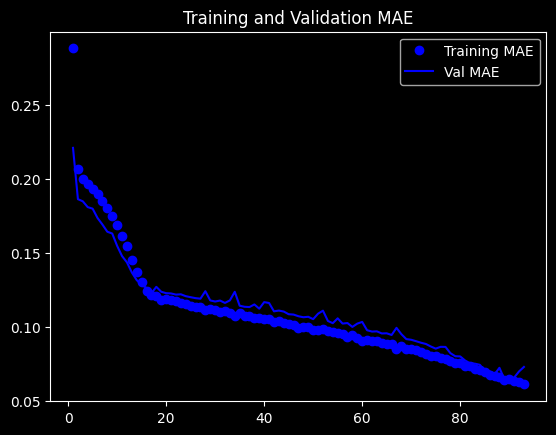

In [16]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Val MAE")
plt.title("Training and Validation MAE")
plt.legend()
plt.show()

## Evaluate the model
Let's evaluate the model's performance on unseen data, the test set

In [17]:
best_lstm = keras.models.load_model("lstm.keras")
evaluation = best_lstm.evaluate(testing_data, testing_labels)
print(f"Test MAE: {evaluation[1]:.3f}")

mae_np = np.array(evaluation)
print(f"As numpy: {mae_np}")
mae_reshaped = mae_np.reshape(-1, 1)
print(f"Reshaped: {mae_reshaped}")

unnormalized_mae = target_scaler.inverse_transform(mae_reshaped)
print(f"Unnormalised: {unnormalized_mae[0][0]}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0664 - mae: 0.0664  
Test MAE: 0.070
As numpy: [0.07026859 0.07026859]
Reshaped: [[0.07026859]
 [0.07026859]]
Unnormalised: 958.2108596735351


# Not bad!
7% MAE, not bad at all!
What about a deeper model?

In [ ]:
#More representational power, but that may not actually be that helpful because loss already decreased pretty rapidly.
#I don't want the model to memorise the dataset I want it to generalise
#Dropout may help with that particular problem
#Let's give it a go

inputs = layers.Input(shape=input_shape)
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
lstm_dropout = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_mae",patience=3), #stops training when validation loss has stopped improving for 3 epochs
    keras.callbacks.ModelCheckpoint(filepath="lstm_dropout.keras",monitor="val_loss",save_best_only=True,), #saves the best model after epoch completion
    keras.callbacks.TensorBoard(log_dir="log_lstm_dropout",)
]

lstm_dropout.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

In [19]:
%reload_ext tensorboard
%tensorboard --logdir "log_lstm_dropout"

In [20]:
lstm_dropout_history = lstm_dropout.fit(training_data, training_labels, epochs=50, batch_size=batch_size, validation_data=(val_data, val_labels), callbacks=callbacks)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1601 - mae: 0.3205 - val_loss: 0.0670 - val_mae: 0.1968
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0714 - mae: 0.2121 - val_loss: 0.0556 - val_mae: 0.1867
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0629 - mae: 0.2048 - val_loss: 0.0550 - val_mae: 0.1832
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0635 - mae: 0.2062 - val_loss: 0.0519 - val_mae: 0.1796
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0625 - mae: 0.2076 - val_loss: 0.0512 - val_mae: 0.1761
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0544 - mae: 0.1890 - val_loss: 0.0481 - val_mae: 0.1721
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0562 - mae: 0.1941 - val_loss: 0.0449 - val_mae: 0.1693
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0517 - mae: 0.1848 - val_loss: 0.0424 - val_mae: 0.1634
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0462 - mae: 

In [21]:
evaluation = lstm_dropout.evaluate(testing_data, testing_labels)
print(f"Test MAE: {evaluation[1]:.3f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0170 - mae: 0.1089 
Test MAE: 0.118


# No Bueno
That's....worse. 11.2%
We have more choices, more options. Stacking GRU layers with dropout?

In [22]:
inputs = layers.Input(shape=input_shape)
x = layers.GRU(16, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(16, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)

gru_dropout = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss",patience=3), #stops training when validation loss has stopped improving for 3 epochs
    keras.callbacks.ModelCheckpoint(filepath="gru_dropout.keras",monitor="val_mae",save_best_only=True,), #saves the best model after epoch completion
    keras.callbacks.TensorBoard(log_dir="log_dir_gru_dropout",)
]

gru_dropout.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])


In [23]:
%reload_ext tensorboard
%tensorboard --logdir "log_dir_gru_dropout"

In [24]:
gru_dropout_history = gru_dropout.fit(training_data, training_labels, epochs=50, batch_size=batch_size, validation_data=(val_data, val_labels), callbacks=callbacks)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1433 - mae: 0.2914 - val_loss: 0.0635 - val_mae: 0.1960
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0798 - mae: 0.2291 - val_loss: 0.0612 - val_mae: 0.1932
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0754 - mae: 0.2206 - val_loss: 0.0591 - val_mae: 0.1904
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0726 - mae: 0.2226 - val_loss: 0.0561 - val_mae: 0.1903
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0619 - mae: 0.2056 - val_loss: 0.0559 - val_mae: 0.1842
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0641 - mae: 0.2043 - val_loss: 0.0518 - val_mae: 0.1816
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0596 - mae: 0.1988 - val_loss: 0.0499 - val_mae: 0.1758
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0615 - mae: 0.2008 - val_loss: 0.0458 - val_mae: 0.1717
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0553 - mae:

In [25]:
evaluation = gru_dropout.evaluate(testing_data, testing_labels)
print(f"Test MAE: {evaluation[1]:.3f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061 - mae: 0.0624 
Test MAE: 0.066


### Interpretation
6.6 percent is pretty good, it feels like getting a model to below 5 percent would be quite good. 
Let's see if we can get there

# Interpretation here


- Bidirectional?

In [26]:
inputs = layers.Input(shape=input_shape)
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
bidirectional_model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss",patience=3), #stops training when validation loss has stopped improving for 3 epochs
    keras.callbacks.ModelCheckpoint(filepath="bidirectional.keras",monitor="val_loss",save_best_only=True,), #saves the best model after epoch completion
    keras.callbacks.TensorBoard(log_dir="log_dir_bidirectional",)
]

bidirectional_model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

In [27]:
%reload_ext tensorboard
%tensorboard --logdir "log_dir_bidirectional"

In [28]:
bidirectional_model_history = bidirectional_model.fit(training_data, training_labels, epochs=50, batch_size=batch_size, validation_data=(val_data, val_labels), callbacks=callbacks)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1597 - mae: 0.3135 - val_loss: 0.0696 - val_mae: 0.2006
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0659 - mae: 0.2058 - val_loss: 0.0564 - val_mae: 0.1894
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0616 - mae: 0.2083 - val_loss: 0.0543 - val_mae: 0.1862
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0632 - mae: 0.2140 - val_loss: 0.0526 - val_mae: 0.1815
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0591 - mae: 0.2027 - val_loss: 0.0500 - val_mae: 0.1793
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0509 - mae: 0.1923 - val_loss: 0.0474 - val_mae: 0.1769
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0470 - mae: 0.1806 - val_loss: 0.0454 - val_mae: 0.1682
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0480 - mae: 0.1824 - val_loss: 0.0420 - val_mae: 0.1685
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0491 - mae: 

In [29]:
evaluation = bidirectional_model.evaluate(testing_data, testing_labels)
print(f"Test MAE: {evaluation[1]:.3f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0131 - mae: 0.0926 
Test MAE: 0.098


### Interpretation
9.8 percent, looking at the data from both directions doesn't seem to be helpful, but I'll explore the idea further before writing it off.

In [30]:
inputs = layers.Input(shape=input_shape)
x = layers.Bidirectional(layers.LSTM(32, recurrent_dropout=0.5, return_sequences=True))(inputs)
x = layers.Bidirectional(layers.LSTM(32, recurrent_dropout=0.5, return_sequences=True))(inputs)
dropout = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(dropout)

stacked_lstm_bidirectional = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss",patience=3), #stops training when validation loss has stopped improving for 3 epochs
    keras.callbacks.ModelCheckpoint(filepath="stacked_bidirectional_lstm.keras",monitor="val_loss",save_best_only=True,), #saves the best model after epoch completion
    keras.callbacks.TensorBoard(log_dir="log_dir_stacked_bidirectional_lstm",)
]

stacked_lstm_bidirectional.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [31]:
stacked_lstm_bidirectional_history = stacked_lstm_bidirectional.fit(training_data, training_labels, epochs=50, batch_size=batch_size, validation_data=(val_data, val_labels), callbacks=callbacks)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1492 - mae: 0.2994 - val_loss: 0.0638 - val_mae: 0.1931
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0741 - mae: 0.2210 - val_loss: 0.0559 - val_mae: 0.1868
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0729 - mae: 0.2257 - val_loss: 0.0535 - val_mae: 0.1839
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0592 - mae: 0.2010 - val_loss: 0.0513 - val_mae: 0.1802
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0604 - mae: 0.2043 - val_loss: 0.0494 - val_mae: 0.1757
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0568 - mae: 0.1990 - val_loss: 0.0471 - val_mae: 0.1721
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0539 - mae: 0.1903 - val_loss: 0.0445 - val_mae: 0.1674
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0509 - mae: 0.1845 - val_loss: 0.0415 - val_mae: 0.1628
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0476 - mae:

In [32]:
evaluation = stacked_lstm_bidirectional.evaluate(testing_data, testing_labels)
print(f"Test MAE: {evaluation[1]:.3f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0123 - mae: 0.0888 
Test MAE: 0.097


### Interpretation
No tangible improvement,we'll try one more with GRU

In [33]:
inputs = layers.Input(shape=input_shape)
x = layers.Bidirectional(layers.GRU(32, recurrent_dropout=0.5, return_sequences=True))(inputs)
x = layers.Bidirectional(layers.GRU(32, recurrent_dropout=0.5, return_sequences=True))(x)
dropout = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(dropout)

stacked_bidirectional_gru = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss",patience=3), #stops training when validation loss has stopped improving for 3 epochs
    keras.callbacks.ModelCheckpoint(filepath="stacked_bidirectional_lstm.keras",monitor="val_loss",save_best_only=True,), #saves the best model after epoch completion
    keras.callbacks.TensorBoard(log_dir="log_dir_stacked_bidirectional_lstm",)
]

stacked_bidirectional_gru.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 

In [34]:
stacked_bidirectional_gru_history = stacked_bidirectional_gru.fit(training_data, training_labels, epochs=50, batch_size=batch_size, validation_data=(val_data, val_labels), callbacks=callbacks)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.1219 - mae: 0.2723 - val_loss: 0.0554 - val_mae: 0.1898
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0584 - mae: 0.2001 - val_loss: 0.0521 - val_mae: 0.1741
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0533 - mae: 0.1885 - val_loss: 0.0416 - val_mae: 0.1571
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0434 - mae: 0.1701 - val_loss: 0.0297 - val_mae: 0.1438
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0349 - mae: 0.1521 - val_loss: 0.0231 - val_mae: 0.1315
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0267 - mae: 0.1305 - val_loss: 0.0197 - val_mae: 0.1206
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0232 - mae: 0.1202 - val_loss: 0.0206 - val_mae: 0.1241
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0238 - mae: 0.1242 - val_loss: 0.0195 - val_mae: 0.1205
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0235 - mae:

In [35]:
evaluation = stacked_bidirectional_gru.evaluate(testing_data, testing_labels)
print(f"Test MAE: {evaluation[1]:.3f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189 - mae: 0.1154 
Test MAE: 0.118


### Interpretation
Markedly worse. Okay bidirectional isn't the answer.

## Further optimisation?

Our stacked GRU model achieved the best result on the unseen test data out of every model architecture we tried, it achieved a MAE of 6.6 percent
I think for something this complicated which is influenced by a multitude of factors an error rate of less than 10% is pretty good.
Especially when you consider the amount of sequences we had for training was only around 1000, which really isn't very much.

But can the model perform better? Let's try using a different optimiser like Adam and see if it yields better results for us. 

In [36]:
inputs = layers.Input(shape=input_shape)
x = layers.GRU(16, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(16, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)

gru_dropout_adam = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss",patience=3), #stops training when validation loss has stopped improving for 3 epochs
    keras.callbacks.ModelCheckpoint(filepath="gru_dropout_adam.keras",monitor="val_mae",save_best_only=True,), #saves the best model after epoch completion
    keras.callbacks.TensorBoard(log_dir="log_dir_gru_dropout",)
]

gru_dropout_adam.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [37]:
gru_dropout_adam.fit(training_data, training_labels, epochs=50, batch_size=batch_size, validation_data=(val_data, val_labels), callbacks=callbacks)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1566 - mae: 0.3132 - val_loss: 0.0570 - val_mae: 0.1928
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0737 - mae: 0.2216 - val_loss: 0.0571 - val_mae: 0.1864
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0761 - mae: 0.2271 - val_loss: 0.0558 - val_mae: 0.1832
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0645 - mae: 0.2068 - val_loss: 0.0529 - val_mae: 0.1789
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0613 - mae: 0.2020 - val_loss: 0.0501 - val_mae: 0.1729
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0626 - mae: 0.2038 - val_loss: 0.0442 - val_mae: 0.1634
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0534 - mae: 0.1892 - val_loss: 0.0363 - val_mae: 0.1589
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0466 - mae: 0.1772 - val_loss: 0.0367 - val_mae: 0.1382
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0373 - mae:

In [38]:
evaluation = gru_dropout_adam.evaluate(testing_data, testing_labels)
print(f"Test MAE: {evaluation[1]:.3f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062 - mae: 0.0567 
Test MAE: 0.061


## Adam to the rescue?

Nice! Adam seems to perform better on this task than rmsprop, we achieved an MAE of 6.1 percent, in absolute terms it may not seem like much but in relative terms that's roughly 10% improvement.
We can still play around with other things though.

We can try different batch sizes?

In [40]:
# Batch size was 16 | We didn't have a lot of data
batch_size = 32

inputs = layers.Input(shape=input_shape)
x = layers.GRU(16, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(16, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)

gru_dropout_adam_32 = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss",patience=3), #stops training when validation loss has stopped improving for 3 epochs
    keras.callbacks.ModelCheckpoint(filepath="gru_dropout_adam_mae.keras",monitor="val_mae",save_best_only=True,), #saves the best model after epoch completion
    keras.callbacks.TensorBoard(log_dir="log_dir_gru_dropout",)
]

gru_dropout_adam_32.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [41]:
gru_dropout_adam_32.fit(training_data, training_labels, epochs=200, batch_size=batch_size, validation_data=(val_data, val_labels), callbacks=callbacks)

Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.1650 - mae: 0.3220 - val_loss: 0.0684 - val_mae: 0.1995
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0740 - mae: 0.2202 - val_loss: 0.0584 - val_mae: 0.1961
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0780 - mae: 0.2263 - val_loss: 0.0601 - val_mae: 0.1890
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0701 - mae: 0.2147 - val_loss: 0.0560 - val_mae: 0.1888
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0707 - mae: 0.2133 - val_loss: 0.0561 - val_mae: 0.1850
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0675 - mae: 0.2122 - val_loss: 0.0533 - val_mae: 0.1836
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0703 - mae: 0.2209 - val_loss: 0.0528 - val_mae: 0.1800
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0645 - mae: 0.2045 - val_loss: 0.0503 - val_mae: 0.1769
Epoch 9/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.06

In [42]:
evaluation = gru_dropout_adam_32.evaluate(testing_data, testing_labels)
print(f"Test MAE: {evaluation[1]:.3f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0131 - mae: 0.0877 
Test MAE: 0.096


### Interpretation
No, the model performed worse with the larger batch size, it clearly isn't generalising as well. 

## Final Result

- Okay changing the batch size did not help us achieve a better mean absolute error on the test set than a batch size of 16.
- So the best result we were able to achieve was 6 percent mean absolute error on the test set.
- Broadly speaking I think that the performance acheived on this task was good, but only because I simplified the original task.
- I wasn't happy with the performance when asking the model to compute a sum of serveral months of output, which leads me to believe that for those tasks when the patterns may be more difficult to infer that an RNN may not be the best choice.
- However there are other limitations at play here, a lot of the data is from countries in Europe and the climate patterns, social and political structure and even geography may be biasing this dataset quite heavily. The amount of data once shaped into a form digestable by an RNN is pretty small. The dataset looks huge and it is, but once you pivot the product types into columns and filter out what you don't want you reduce the size considerably. 
- My LLM use has been noted and was mostly surrounding pandas and data manipulation because that's the thing I have the least experience with and pandas is quite a powerful and deep library.

## The Question
Do I think RNNs are useful for this task? Prediction power output of a country based on past power generation data?
I would have to say yes, but within the context established in this notebook. 3 month sequences predicting the power output of the 4th month. 
When I tried any kind of longer sequence or tried to predict a sum of values that represented solar output over a timespan of more than 1 month MAE was closer to 20% and I would not consider that to be at all useful. 
In a different context it might be useful or interesting to see how an RNN compares to a simple regression model for this task, but that's a question for another time. 